# Folgen

## Task 1
Schreiben Sie eine Funktion für die Folgen
\begin{align*}
A_{n} &= \dfrac{(-1)^{n} *4 n}{n^{2} + 2} \\[12pt]
B_{n} &= \dfrac{(-1)^{n} *4 n}{n + 2}
\end{align*}


In [1]:
A <- function(n){
 return(((-1)^n*4*n)/(n^2+2))
}

B <- function(n){
    return(((-1)^n*4*n)/(n+2))
}

## Task 2

Erstellen Sie eine Liste aller Folgenwerte $A_n$ und $B_n$ für $n \in [1,100]$ wobei $n \in \mathbb{N}$.

In [2]:
An <- A(seq(1,100,1))
Bn <- B(seq(1,100,1))

## Task 3

Schreiben Sie eine Funktion, die eine Folgen generierende Funktion (hier A oder B) entgegennimmt sowie einen Toleranzwert $\varepsilon$.  Die Funktion soll dann ermitteln, ob die Folge gegen einen Grenzwert konvergiert. 



Für diese Funktion und in Anlehnung an das Cauchy-Kriterium definieren wir dazu, dass eine Folge konvergiert, wenn die folgenden Kriterien erfüllt sind:
- der Absolutwert der Differenz der direkten Nachfolger innerhalb der Folge kleiner als der Toleranzwert ist, d.h. $|a_{n+1} - a_{n}|<\varepsilon$.
- der Absolutwert der Differenz des 100. Folgewerts innerhalb der Folge kleiner als der Toleranzwert ist, d.h.
$|a_{n+100} - a_{n}|<\varepsilon$.

Die Stelle in der Folge, an der diese beiden Kriterien erfüllt sind, soll $n_{\varepsilon}$ genannt werden.

Darüberhinaus legen wir für unsere Funktion fest, dass eine Folge als divergent eingestuft wird, wenn nach $10^6$ Iterationen die obigen Kriterien nicht erfüllt sind. 

Um den Grenzwert zu ermitteln, werten Sie die Folge $10^4$ Schritte nach $n_{\varepsilon}$ aus.

Im Fall einer konvergenten Folge soll Ihre Funktion eine Liste mit dem Grenzwert sowie der Stelle $n_{\varepsilon}$ zurückgeben.

In [3]:
# todo
limes <- function(fn,epsl){
    n <- err1 <- err2  <- 1
    while((err1 > epsl)|(err2 >epsl)){
        n = n+1
        err1 = abs(fn(n+1)-fn(n))
        err2 = abs(fn(n+100)-fn(n))
        lim = fn(n+10**4)
        if (n > 10**(6)){
            print("Sequence did not converge!")
            n = -1
            lim="Error"
            break 
        }
    }
    return(list(Grenzwert=lim,n=n))

}

epsl = 0.4
limes(A,epsl)
limes(B,epsl)

$Grenzwert
[1] 0.0003992016

$n
[1] 20

[1] "Sequence did not converge!"


$Grenzwert
[1] "Error"

$n
[1] -1

## Task 4
Erstellen Sie ein Graphik für $A_n$. Zeichnen Sie den Grenzwert $\lim_{n \to \infty} a_n = a$, den Ihre Funktion ermittelt, ein. Verwenden Sie einen Toleranzwert von 0.4. Hebn Sie den Bereich $[a-\varepsilon,a+\varepsilon]$ in Ihrer Graphik hervor. Machen Sie außerdem den Wert deutlich, ab dem die Konvergenzkriterien Ihrer Funktion erfüllt sind, d.h. $n_\varepsilon$.

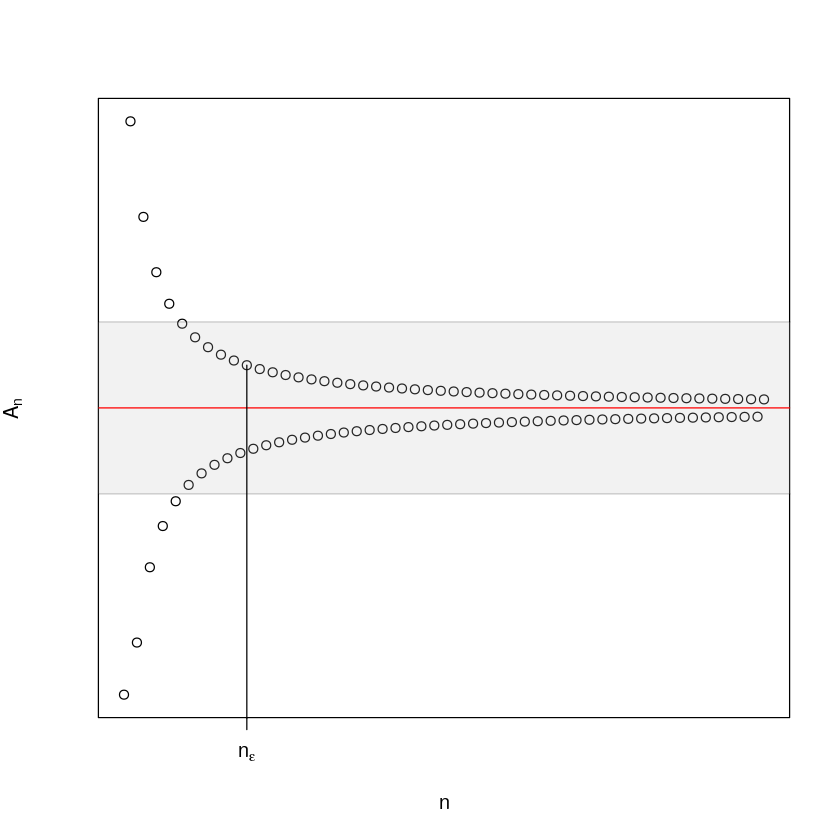

In [4]:
n <- 1:1:100
An <- A(n)
epsilon <- 0.4
lim <- limes(A,epsilon)
a <- lim$Grenzwert
n_epsilon <- lim$n

plot(n,An,ylab=expression(A[n]),xlab="n",yaxt='n',xaxt='n')
polygon(x=c(-0.1*n[length(n)],1.1*n[length(n)],n[length(n)]*1.1,-10),
        y=c(a+epsilon,a+epsilon,a-epsilon,a-epsilon),
        col=adjustcolor("gray",alpha.f=0.2),border=adjustcolor("black",alpha.f=0.2))
abline(h=a,col="red")
lines(x=c(n_epsilon,n_epsilon),y=c(-100,A(n_epsilon)),col="black")
axis(side =1, n_epsilon, labels = expression(n[epsilon]))



## Task 5

Schreiben Sie eine Funktion, die lediglich eine Funktion für eine Folge entgegennimmt, einen Toleranzwert $\varepsilon$ die obere Grenze für $n$ bis zu welcher die Folge abgetragen werden soll. Die Funktion soll, keinen Ausgabewert haben, jedoch einen Graphen wie in Task 4 erstellt.

Testen Sie die Funktion mit der Folge:

\begin{align*}
C_n = 1+\frac{1}{n}
\end{align*}


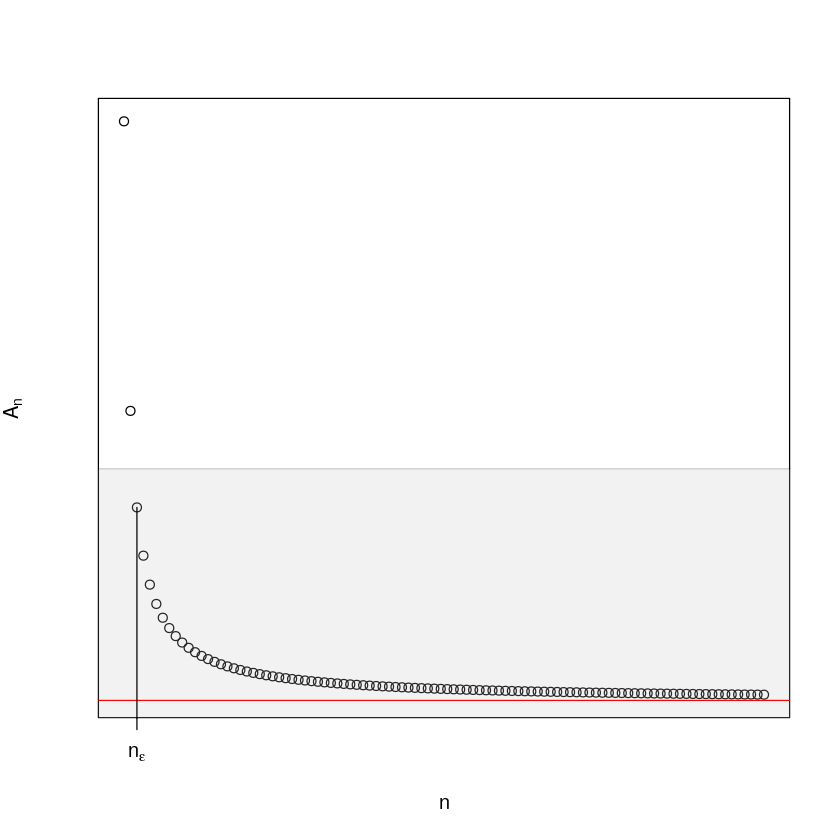

In [5]:
C <- function(n){
 return(1+1/n)
}

plot_sequence <- function(S,epsilon,nlim){
    n <- 1:1:nlim
    Sn <- S(n)
    lim <- limes(S,epsilon)
    a <- lim$Grenzwert
    n_epsilon <- lim$n

    plot(n,Sn,ylab=expression(A[n]),xlab="n",yaxt='n',xaxt='n')
    polygon(x=c(-0.1*n[length(n)],n[length(n)]*1.1,n[length(n)]*1.1,-10),
            y=c(a+epsilon,a+epsilon,a-epsilon,a-epsilon),
            col=adjustcolor("gray",alpha.f=0.2),border=adjustcolor("black",alpha.f=0.2))
    abline(h=a,col="red")
    lines(x=c(n_epsilon,n_epsilon),y=c(-100,S(n_epsilon)),col="black")
    axis(side =1, n_epsilon, labels = expression(n[epsilon]))
}

eps <- 0.4
plot_sequence(C,eps,100)



## Task 6
Nuzten Sie die in Task 4 erstellte Funktion um die geometrische Reihe $q = \frac{1}{1.02}$ für die partiellen Summen bis $ n = 1000$ zu zeichnen. <br>

\begin{align*}
S_{n} = \sum\limits_{k=0}^{n}\left(\frac{1}{1.02}\right)^{k}
\end{align*}

In [ ]:
G <- function(n){
    series <- matrix(length(n),1)
    # Handle case where only one series realization is wanted
    if (length(n)==1){
        series <- sum((1.02)^(-seq(1,n)))   
    }else{
        # Handle case where several realizations are wanted
        for (nn in n){
            series[nn] <- sum((1.02)^(-seq(1,nn)))
        }  
    }

    return(series)    
}
eps <- 0.4
plot_sequence(G,eps,1000)